# Step 1: Load dataset from Kaggle

In [ ]:
#@title Get dataset from Kaggle
# Install kaggle
!pip install -q kaggle

# Import necessary libraries
from google.colab import userdata
import os

# Setup keys for accessing kaggle datasets
os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')
os.environ['KAGGLE_USERNAME'] = userdata.get('KAGGLE_USERNAME')

# Dataset link: https://www.kaggle.com/datasets/camnugent/california-housing-prices

# Download dataset zip file from kaggle and unzip the zip file
!kaggle datasets download -d camnugent/california-housing-prices
!unzip california-housing-prices.zip

100% 400k/400k [00:00<00:00, 812kB/s]
100% 400k/400k [00:00<00:00, 811kB/s]
Archive:  california-housing-prices.zip
  inflating: housing.csv             


In [ ]:
#@title Install yellowbrick
!pip install yellowbrick

from yellowbrick.cluster import KElbowVisualizer

# Step 2: Undestanding the dataset

In [ ]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the CSV file
df = pd.read_csv('housing.csv')

In [ ]:
# Check available features in dataset
list(df)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [ ]:
# View top 5 rows of dataframe
df.head(n=5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# Print all info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# Return description of data in dataframe
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
# Counts the number of not empty values for each row or column
df.count()

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64

In [ ]:
# Identifies duplicated rows in dataframe
df.duplicated().sum()

0

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

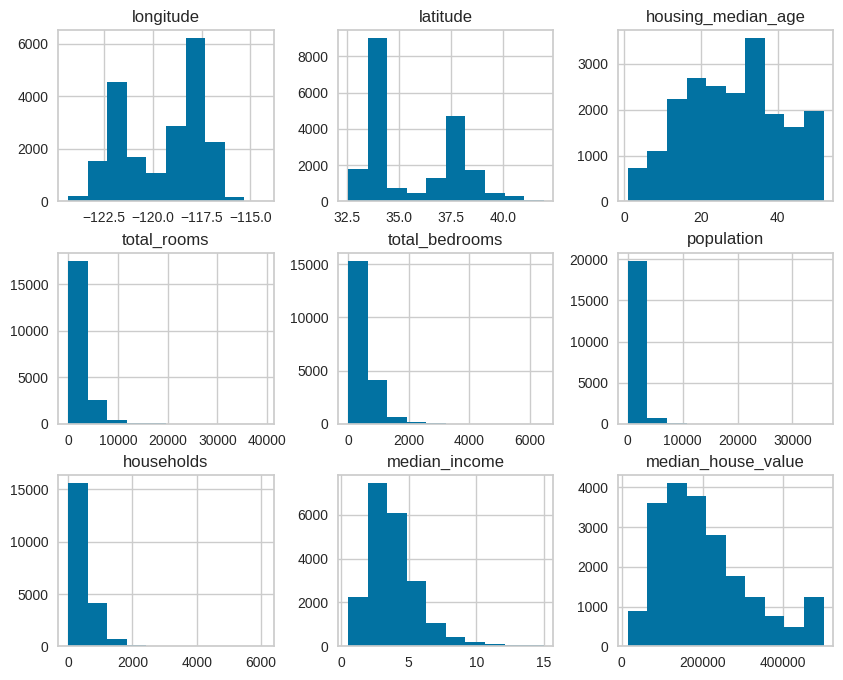

In [ ]:
# Create histograms
df.hist(figsize=(10,8))

# Step 3: Data Preprocessing

In [ ]:
data = df.sample(n=20000,random_state=42)

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
4809,-118.34,34.03,47.0,1927.0,561.0,1349.0,508.0,1.3444,125000.0,<1H OCEAN
10916,-117.87,33.74,52.0,2411.0,526.0,2165.0,521.0,3.4150,172500.0,<1H OCEAN
3636,-118.43,34.24,37.0,1279.0,241.0,987.0,233.0,4.0057,172700.0,<1H OCEAN
17844,-121.85,37.44,8.0,426.0,61.0,241.0,55.0,7.3090,367900.0,<1H OCEAN


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

column_to_encode = [i for i in data.columns if data[i].dtypes == object]

# Encoding
label_encoders={}
for column in column_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,1
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,1
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,3
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,0
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,4
...,...,...,...,...,...,...,...,...,...,...
4809,-118.34,34.03,47.0,1927.0,561.0,1349.0,508.0,1.3444,125000.0,0
10916,-117.87,33.74,52.0,2411.0,526.0,2165.0,521.0,3.4150,172500.0,0
3636,-118.43,34.24,37.0,1279.0,241.0,987.0,233.0,4.0057,172700.0,0
17844,-121.85,37.44,8.0,426.0,61.0,241.0,55.0,7.3090,367900.0,0


In [ ]:
# Checking missing value
def get_numerical_summary(df):
    total = df.shape[0]
    missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    missing_percent = {}
    for col in missing_columns:
        null_count = df[col].isnull().sum()
        per = (null_count/total) * 100
        missing_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_percent

    missing_percent = get_numerical_summary(df)

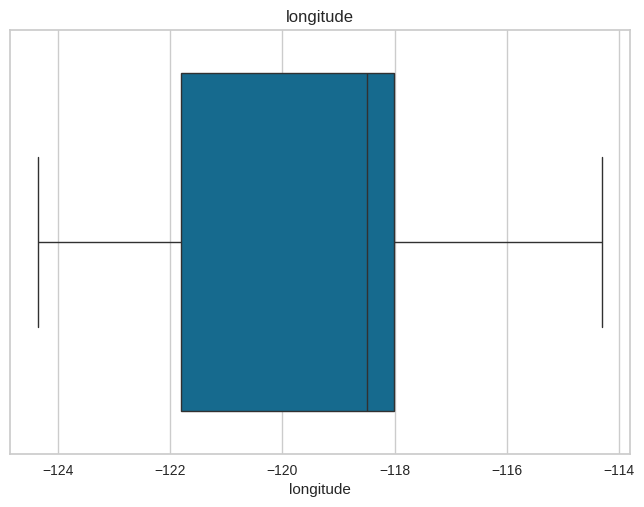

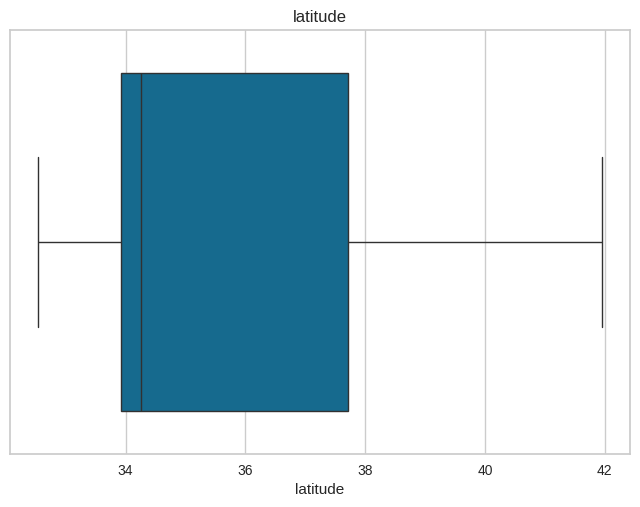

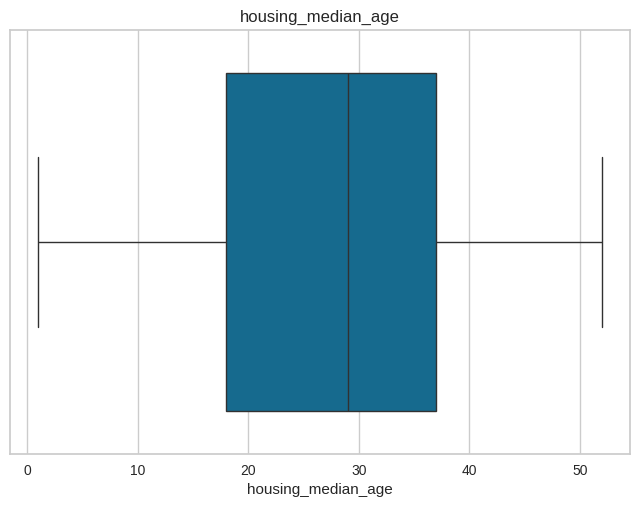

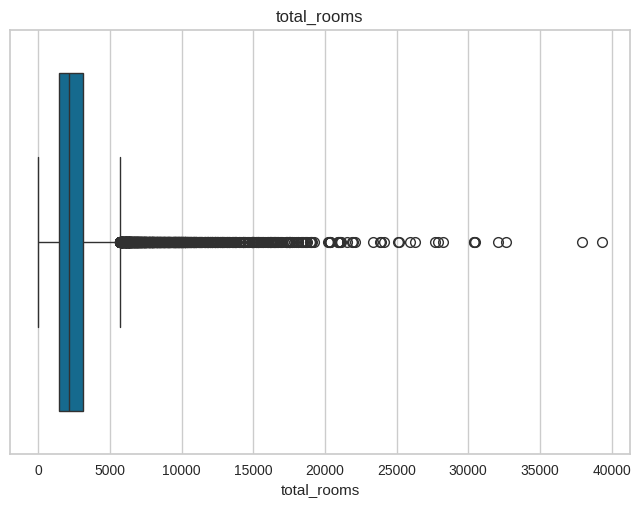

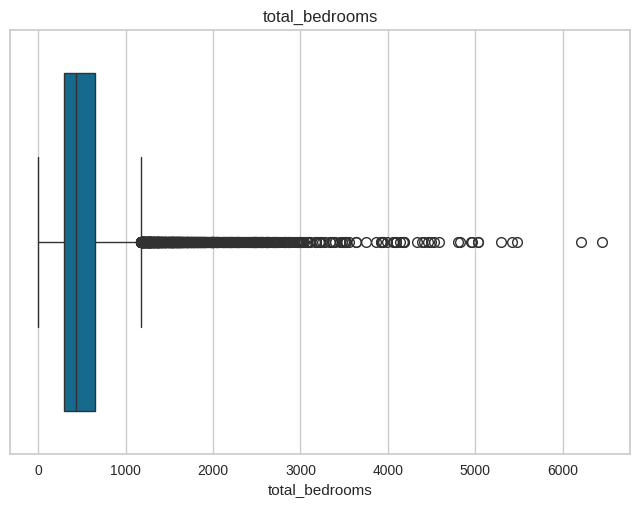

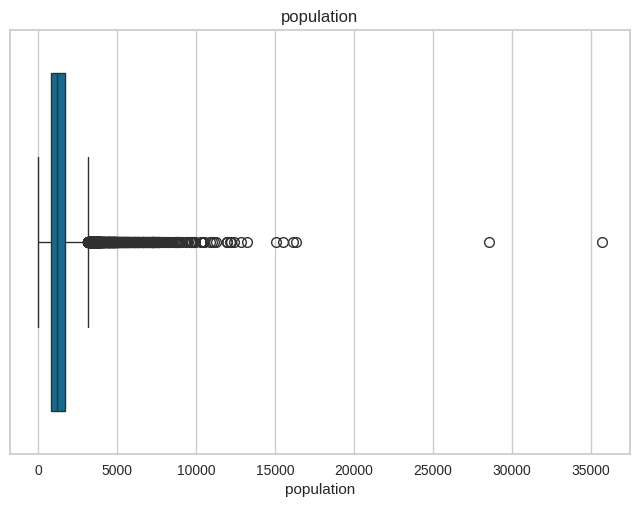

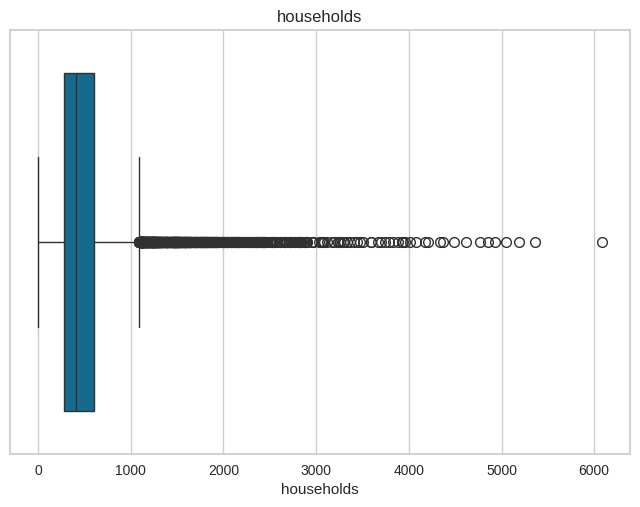

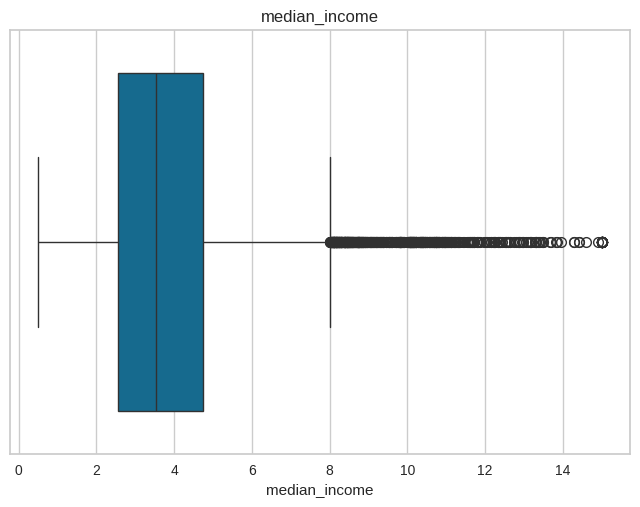

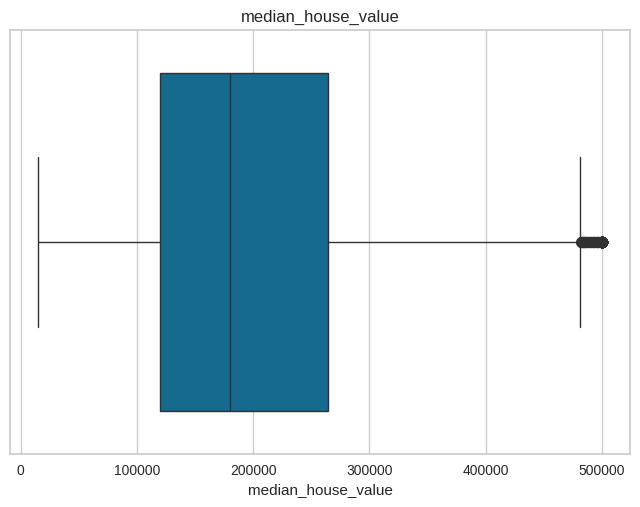

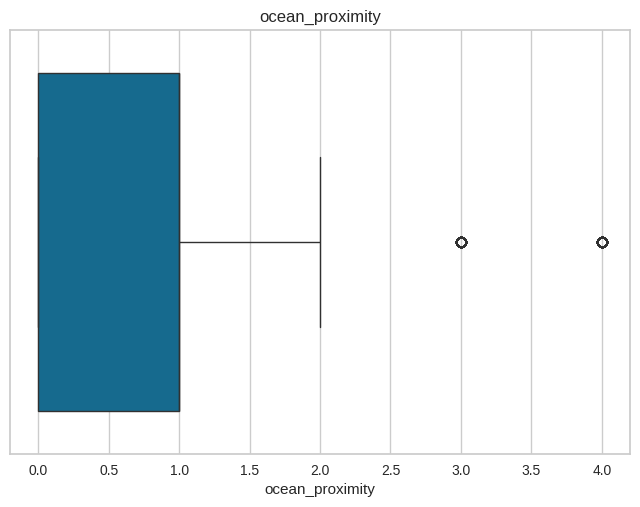

In [ ]:
for i in data.columns:
  sns.boxplot(x = data[i])
  plt.title(i)
  plt.show()

In [ ]:
#@title Outlier: IQR
def remove_outlier(data):
    Q3,Q1 = data.quantile(0.75) ,data.quantile(0.25)
    IQR = Q3 -Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data<lower_bound) | (data>upper_bound)]
    data_flagged = data.copy()
    data_flagged[(data_flagged<lower_bound)|(data_flagged>upper_bound)] = np.nan

    return data_flagged

data_flagged = remove_outlier(data)

print("Missing Value:\n")
print(data_flagged.isna().sum())
print("\nData After Removed Outlier:\n")
print(data_flagged.count())


Missing Value:

longitude                0
latitude                 0
housing_median_age       0
total_rooms           1246
total_bedrooms        1436
population            1161
households            1178
median_income          660
median_house_value    1028
ocean_proximity       4805
dtype: int64

Data After Removed Outlier:

longitude             20000
latitude              20000
housing_median_age    20000
total_rooms           18754
total_bedrooms        18564
population            18839
households            18822
median_income         19340
median_house_value    18972
ocean_proximity       15195
dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer
def impute_missing_values(data, strategy='median', columns=None):
    """
    Impute missing values in the specified columns of a DataFrame.

    Parameters:
    - data (DataFrame): Input DataFrame containing missing values.
    - strategy (str): Strategy to use for imputation. Can be 'mean', 'median', 'most_frequent', or 'constant'.
    - columns (list or None): List of column names to impute. If None, impute all columns.

    Returns:
    - DataFrame: DataFrame with missing values imputed.
    """

    # Initialize the imputer
    imputer = SimpleImputer(strategy=strategy)

    # Select columns to impute
    if columns is None:
        columns_to_impute = data.columns
    else:
        columns_to_impute = columns

    # Impute missing values
    imputed_data = pd.DataFrame(imputer.fit_transform(data[columns_to_impute]), columns=columns_to_impute)

    return imputed_data

data_flagged = impute_missing_values(data_flagged,columns=data_flagged.columns)

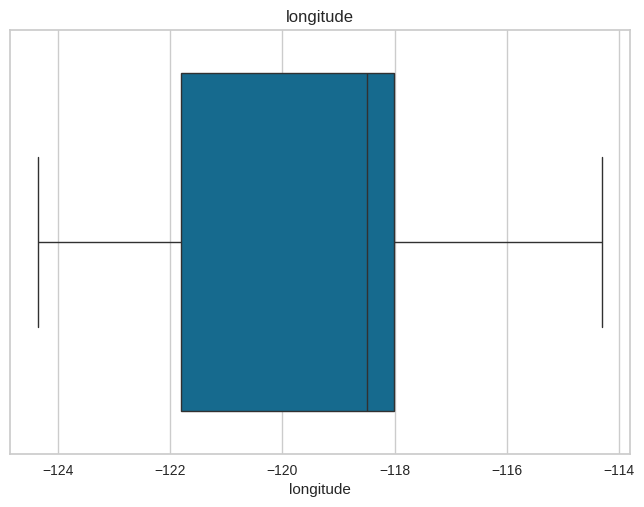

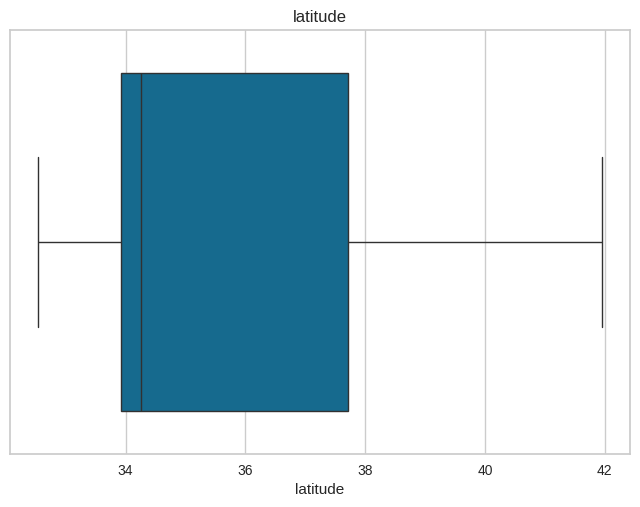

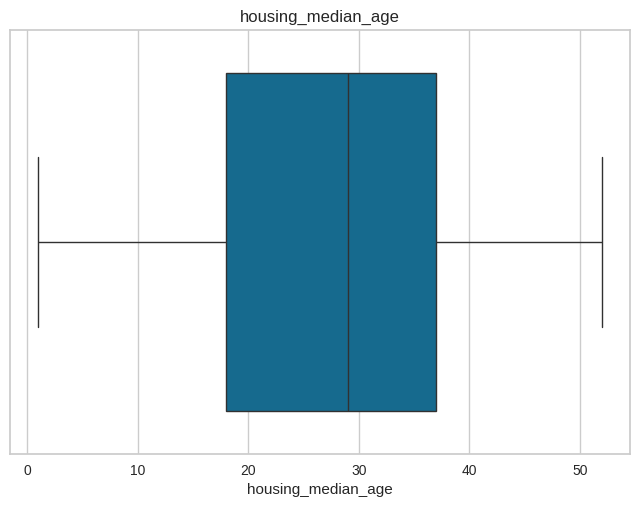

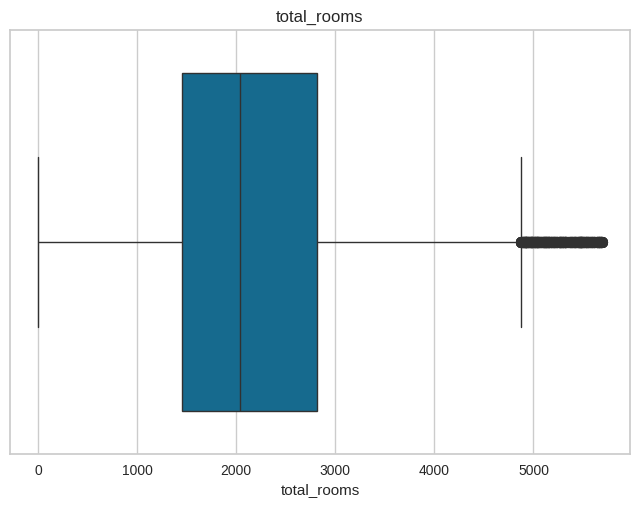

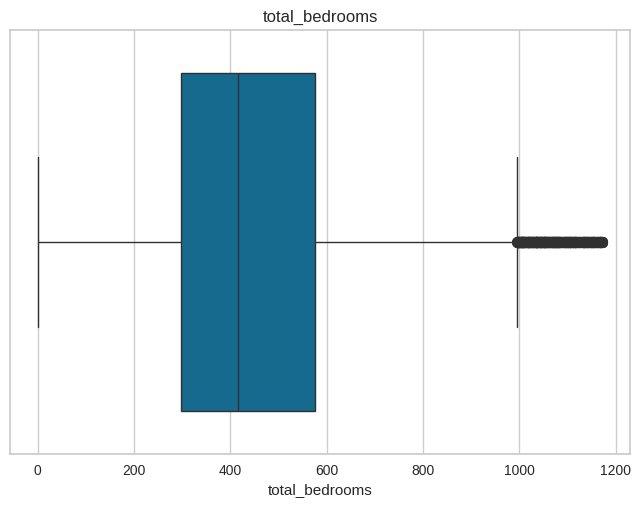

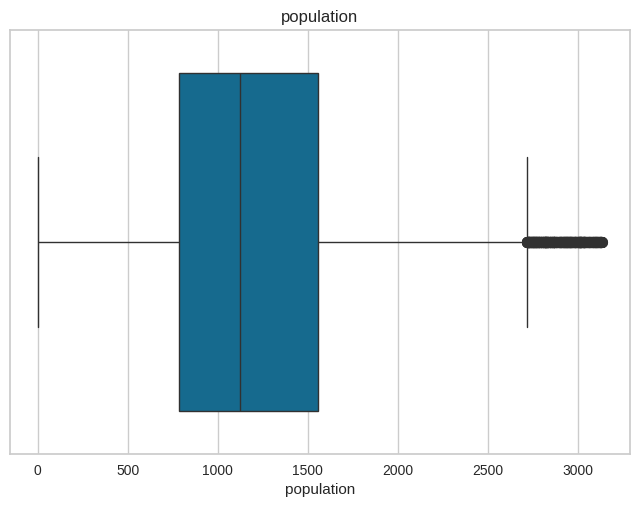

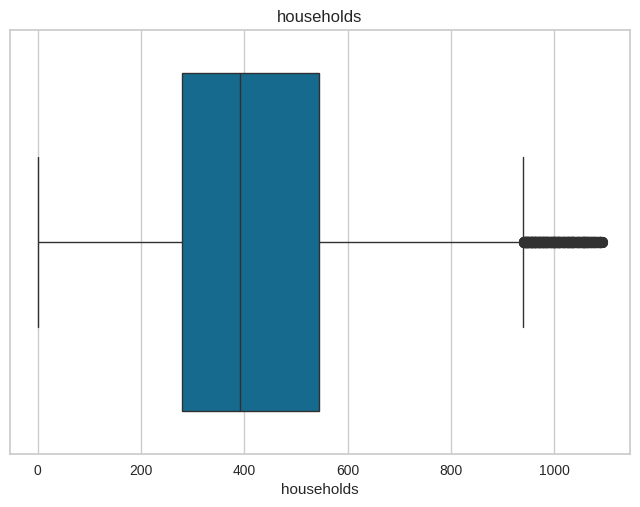

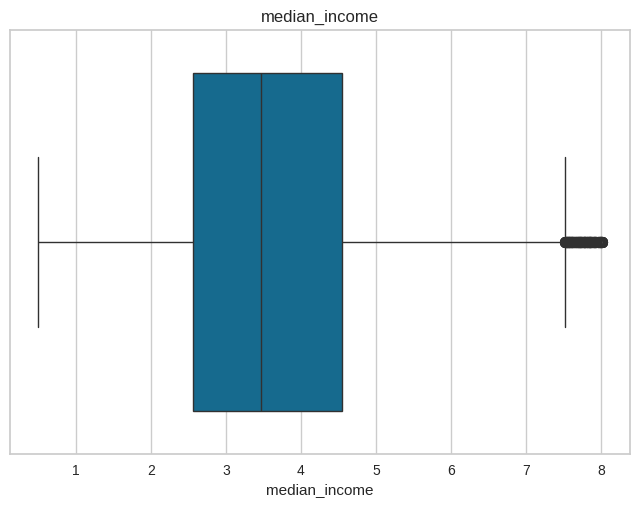

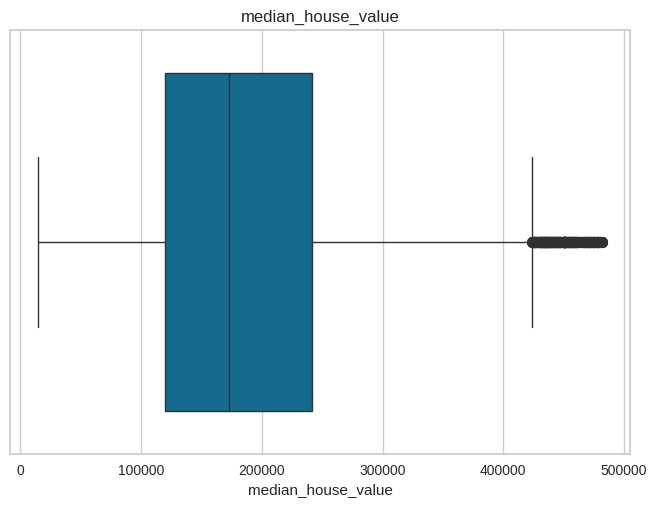

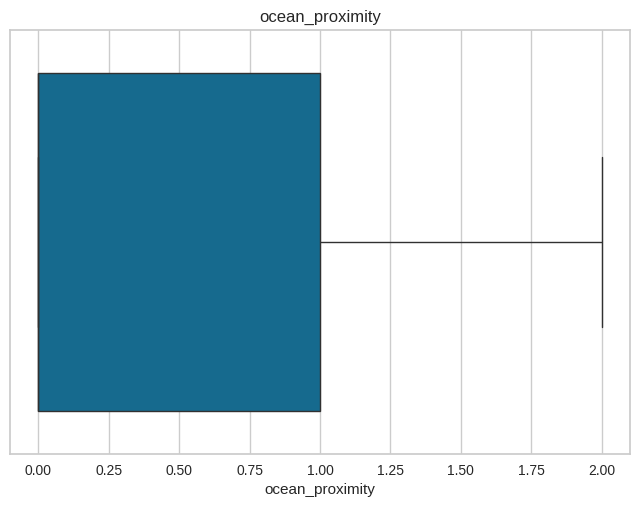

In [ ]:
for i in data_flagged.columns:
  sns.boxplot(x = data_flagged[i])
  plt.title(i)
  plt.show()

In [ ]:
# data_flagged = data_flagged.dropna()
display(data_flagged)
print("\nCount of Dataset:\n")
print(data_flagged.count())
print("\nMissing Value:\n")
data_flagged.isna().sum()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.01,36.06,25.0,1505.0,416.0,1392.0,359.0,1.6812,47700.0,1.0
1,-119.46,35.14,30.0,2943.0,416.0,1565.0,584.0,2.5313,45800.0,1.0
2,-122.44,37.80,52.0,3830.0,416.0,1310.0,963.0,3.4801,173200.0,0.0
3,-118.72,34.28,17.0,3051.0,416.0,1705.0,495.0,5.7376,218600.0,0.0
4,-121.93,36.62,34.0,2351.0,416.0,1063.0,428.0,3.7250,278000.0,0.0
...,...,...,...,...,...,...,...,...,...,...
19995,-118.34,34.03,47.0,1927.0,561.0,1349.0,508.0,1.3444,125000.0,0.0
19996,-117.87,33.74,52.0,2411.0,526.0,2165.0,521.0,3.4150,172500.0,0.0
19997,-118.43,34.24,37.0,1279.0,241.0,987.0,233.0,4.0057,172700.0,0.0
19998,-121.85,37.44,8.0,426.0,61.0,241.0,55.0,7.3090,367900.0,0.0



Count of Dataset:

longitude             20000
latitude              20000
housing_median_age    20000
total_rooms           20000
total_bedrooms        20000
population            20000
households            20000
median_income         20000
median_house_value    20000
ocean_proximity       20000
dtype: int64

Missing Value:



longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'ocean_proximity'}>, <Axes: >, <Axes: >]],
      dtype=object)

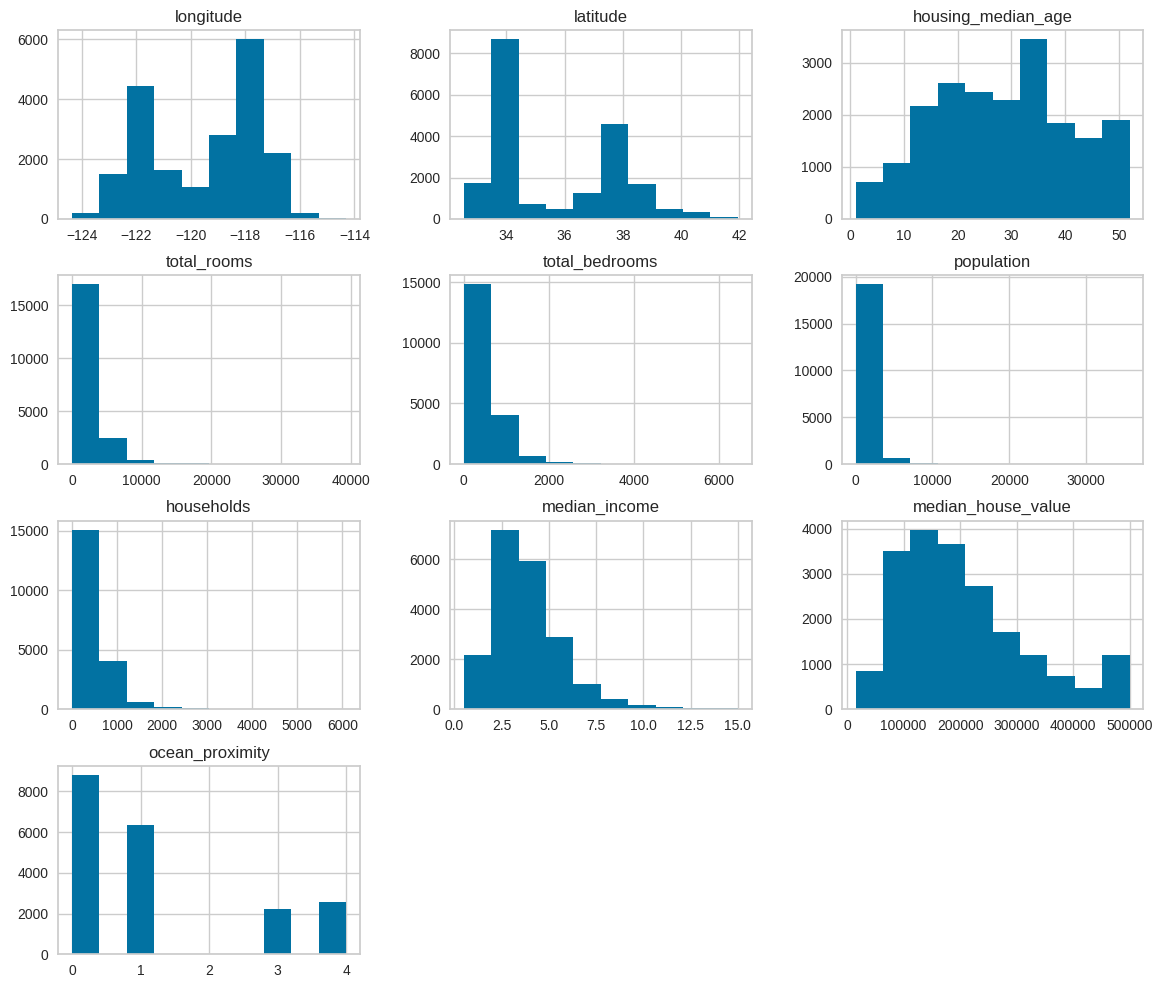

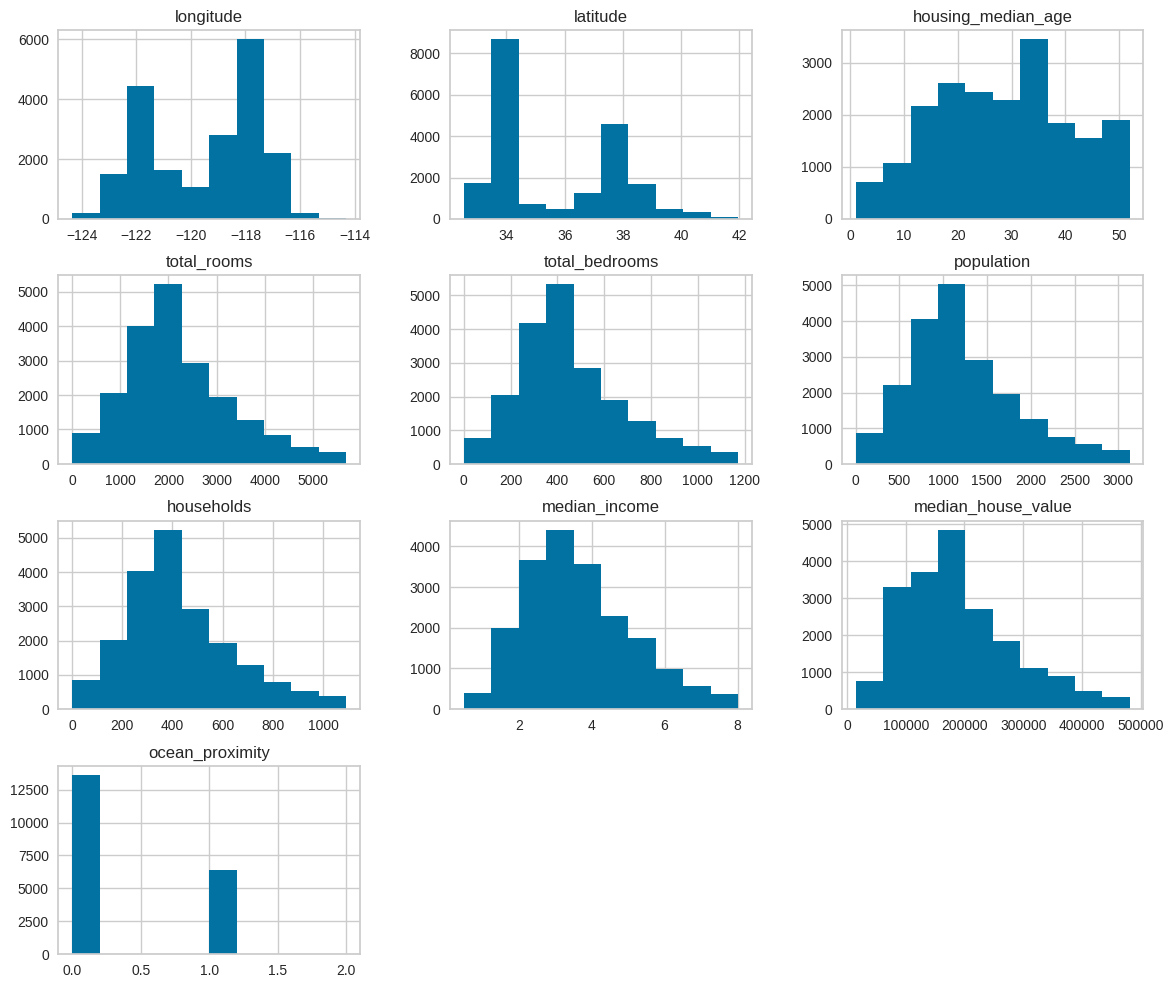

In [ ]:
data.hist(figsize=(14,12))
data_flagged.hist(figsize=(14,12))

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'ocean_proximity'}>, <Axes: >, <Axes: >]],
      dtype=object)

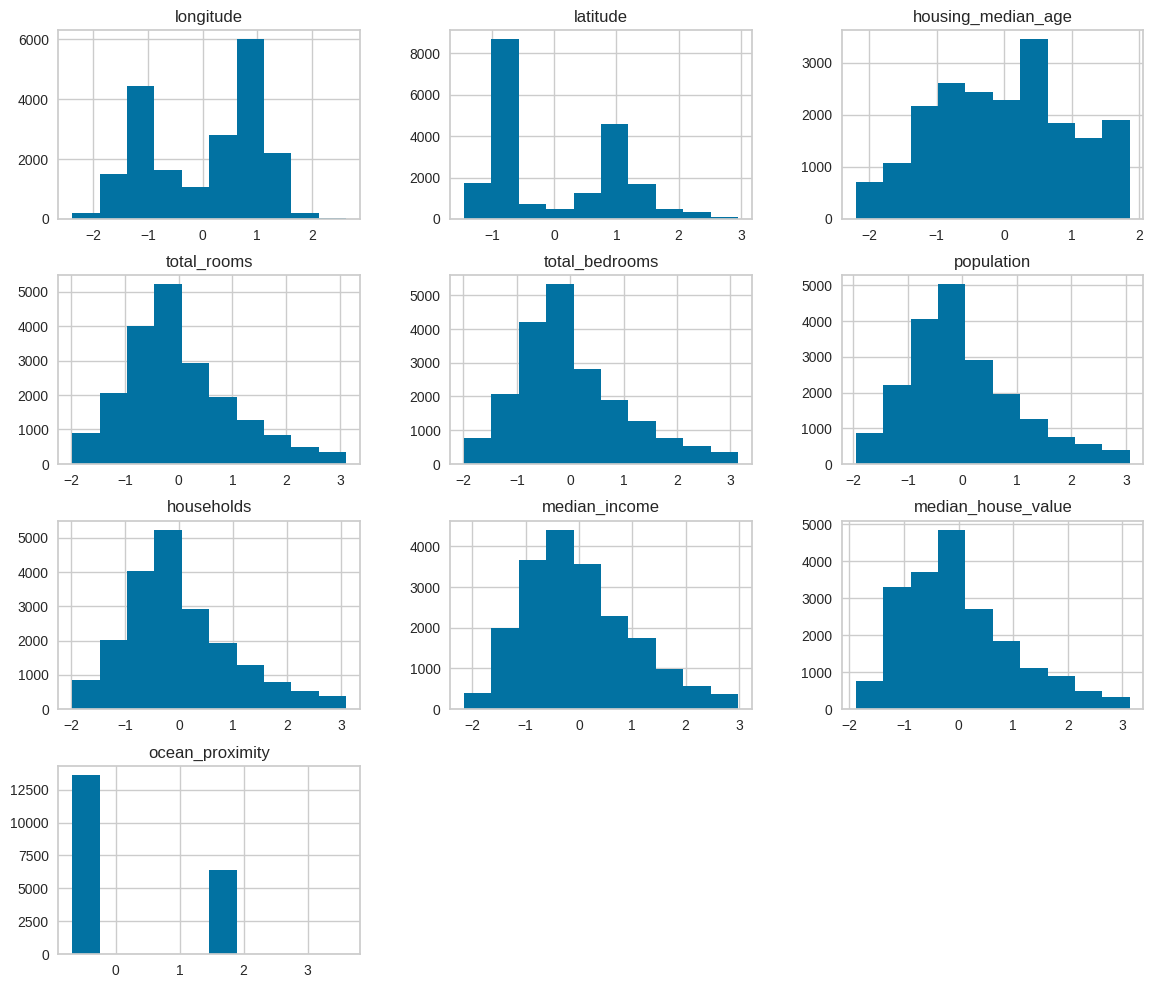

In [ ]:
#@title StandardScaler
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = data_flagged

scaled_data.loc[:, scaled_data.columns] = scaler.fit_transform(scaled_data.loc[:,scaled_data.columns])
scaled_data.hist(figsize=(14,12))

In [ ]:
data = scaled_data

In [ ]:
pd.DataFrame({"Var":data.var(),"STD":data.std()})

,Var,STD
longitude,1.00005,1.000025
latitude,1.00005,1.000025
housing_median_age,1.00005,1.000025
total_rooms,1.00005,1.000025
total_bedrooms,1.00005,1.000025
population,1.00005,1.000025
households,1.00005,1.000025
median_income,1.00005,1.000025
median_house_value,1.00005,1.000025
ocean_proximity,1.00005,1.000025


In [ ]:
data.cov()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
longitude,1.000050,-0.924646,-0.108391,0.003914,0.034059,0.098710,0.037677,-0.014221,-0.045495,-0.054802
latitude,-0.924646,1.000050,0.011308,-0.012443,-0.047596,-0.123286,-0.070033,-0.079788,-0.144577,0.349612
housing_median_age,-0.108391,0.011308,1.000050,-0.261229,-0.221367,-0.213174,-0.206192,-0.155048,0.056295,-0.235920
total_rooms,0.003914,-0.012443,-0.261229,1.000050,0.780769,0.688091,0.785099,0.215877,0.169053,-0.020390
total_bedrooms,0.034059,-0.047596,-0.221367,0.780769,1.000050,0.740289,0.933188,-0.001830,0.085822,-0.047643
population,0.098710,-0.123286,-0.213174,0.688091,0.740289,1.000050,0.785731,0.006072,0.019507,-0.066030
households,0.037677,-0.070033,-0.206192,0.785099,0.933188,0.785731,1.000050,0.029301,0.108498,-0.082403
median_income,-0.014221,-0.079788,-0.155048,0.215877,-0.001830,0.006072,0.029301,1.000050,0.574918,-0.230089
median_house_value,-0.045495,-0.144577,0.056295,0.169053,0.085822,0.019507,0.108498,0.574918,1.000050,-0.486643
ocean_proximity,-0.054802,0.349612,-0.235920,-0.020390,-0.047643,-0.066030,-0.082403,-0.230089,-0.486643,1.000050


<Axes: >

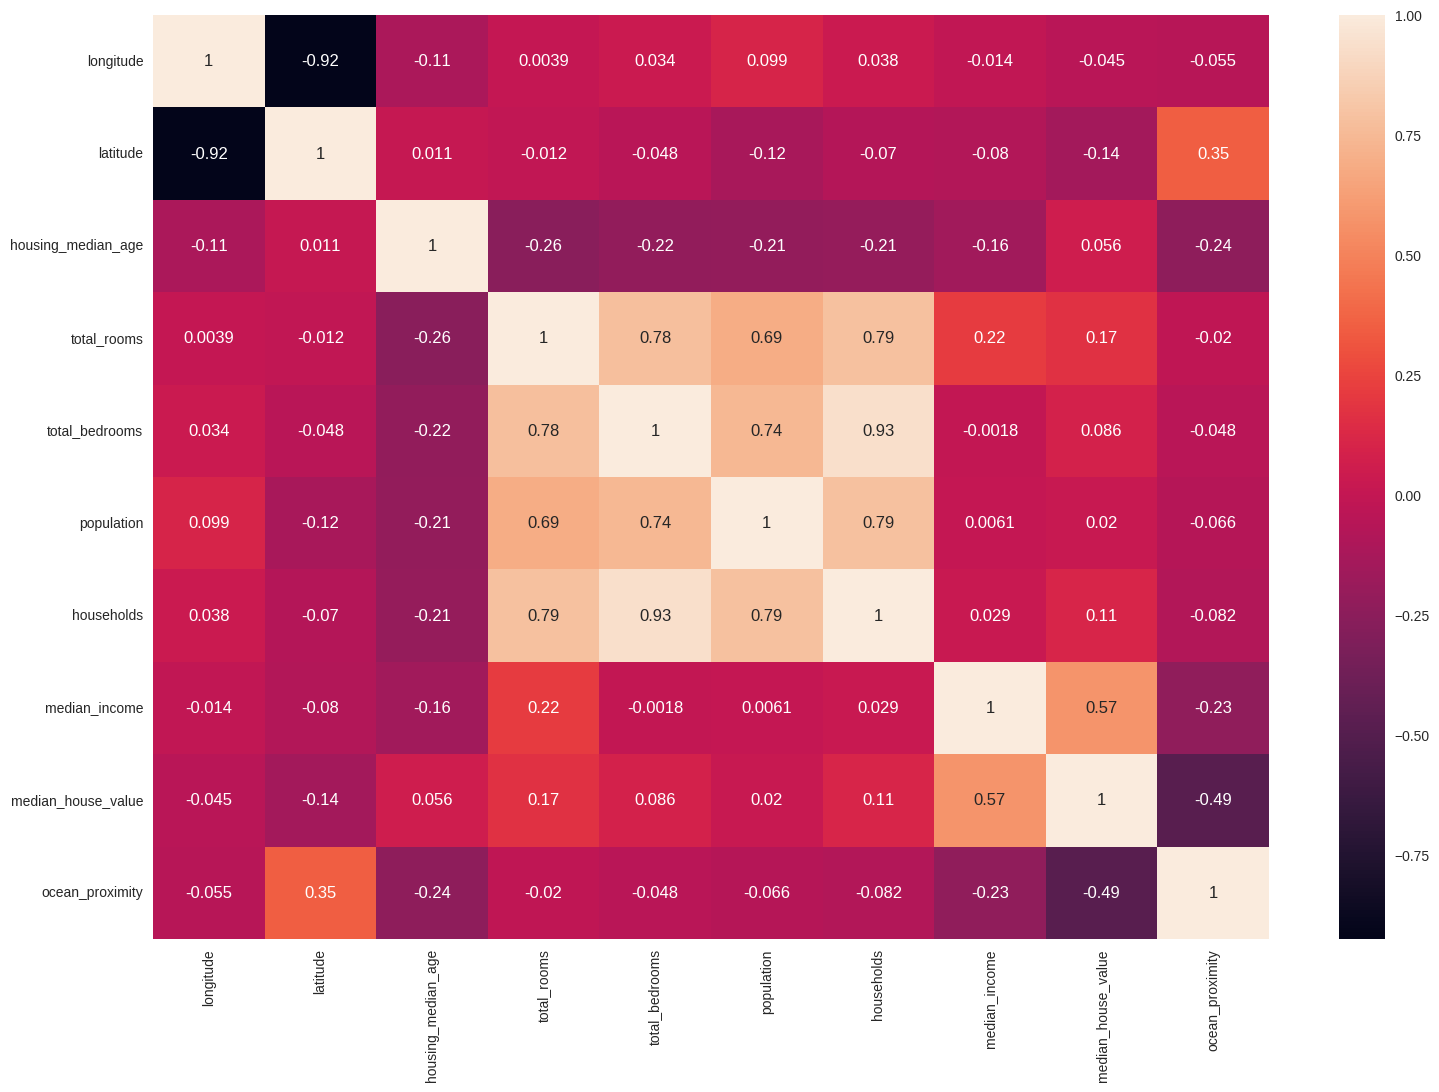

In [ ]:
#@title Correlation
plt.figure(figsize = (18,12))
sns.heatmap(data.corr(), annot= True)

In [ ]:
#@title Show high correlation features with the Median House Value
threshold = 0.5
# Calculate correlation between each feature and the target variable
correlation_with_income = data.corr()["median_house_value"].abs().sort_values(ascending=False)

# Select the top 10 features with the highest correlation
top_10_correlated_features = correlation_with_income.index[1:11]  # Exclude the target variable itself

# Get the correlation coefficients for the top 10 features
top_10_correlation_coefficients = correlation_with_income.iloc[1:11]

pd.DataFrame(data = top_10_correlation_coefficients,index=(top_10_correlated_features),columns =["median_house_value"])

,median_house_value
median_income,0.574889
ocean_proximity,0.486619
total_rooms,0.169045
latitude,0.144570
households,0.108493
total_bedrooms,0.085818
housing_median_age,0.056292
longitude,0.045492
population,0.019506


# Libraries

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
import statistics
import time

# Hierarchical
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

warnings.filterwarnings('ignore')

In [ ]:
warnings.filterwarnings('ignore')

x = scaled_data
k_range = range(2,11)

## Step 4: Dimensionality reduction using PCA

In [ ]:
from sklearn.decomposition import PCA
ori_data = scaled_data
pca = PCA()
pca.fit(ori_data)
# Amount of variance does each PC
'''
the importance of each feature is reflected by the magnitude of the corresponding values in the eigenvectors (higher magnitude - higher importance)
'''
print(f"Show the PCs ({len(pca.explained_variance_ratio_)})")
print(np.round(pca.explained_variance_ratio_,4))

Show the PCs (10)
[0.3503 0.2101 0.1746 0.1145 0.0554 0.0364 0.0281 0.0215 0.0063 0.0027]


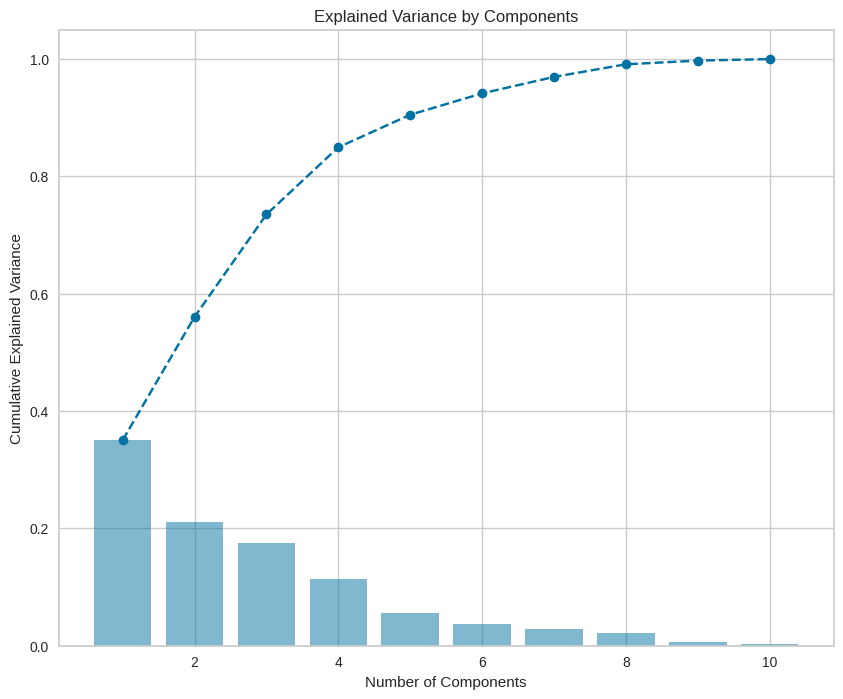



Total number of Principal Components More than 80% is : 4


In [ ]:
#@title PCA Explained Variance by components

plt.figure(figsize=(10, 8))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker="o", linestyle='--')
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

# Select the Number of Principal Components
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.8) + 1
print("\n\nTotal number of Principal Components More than 80% is : {}".format(n_components))

In [ ]:
# @title List the most important feature on EACH component
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(ori_data)

# Number of Components
n_pcs = pca.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = ori_data.columns
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]


# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}
pca_df = pd.DataFrame(dic.items(),columns=["PCs","Feature",])
pca_df

,PCs,Feature
0,PC1,households
1,PC2,latitude
2,PC3,longitude
3,PC4,housing_median_age


In [ ]:
pca_data = pd.DataFrame(pca_data,columns=pca_df["PCs"])
display(pca_data)

PCs,PC1,PC2,PC3,PC4
0,-0.759346,1.521934,-1.990924,0.090684
1,0.509292,1.400234,-1.668319,-0.070427
2,1.408509,1.219107,1.497420,-2.137410
3,1.251752,-1.176747,0.412920,1.077913
4,-0.191233,0.083889,1.586576,-0.578354
...,...,...,...,...
19995,0.082719,-0.352557,-1.352077,-2.227078
19996,0.991389,-1.061350,-0.651941,-1.917719
19997,-1.444864,-1.282566,-0.251353,-0.361758
19998,-2.595048,-1.158068,3.091421,2.675443


In [ ]:
# Calculate absolute loadings
absolute_loadings = np.abs(pca.components_)
# Choose features with highest absolute loadings for each principal component
n_top_features = 5  # Number of top features to select
important_features = []
for component_loadings in abs(pca.components_):
    top_feature_indices = np.argsort(component_loadings)[-n_top_features:][::-1]
    top_features = [ori_data.columns[i] for i in top_feature_indices]
    important_features.append(top_features)

# Print important features for each principal component
for i, features in enumerate(important_features):
    print(f"Principal Component {i+1}: {features}")

Principal Component 1: ['households', 'total_bedrooms', 'total_rooms', 'population', 'housing_median_age']
Principal Component 2: ['latitude', 'longitude', 'ocean_proximity', 'median_house_value', 'median_income']
Principal Component 3: ['longitude', 'median_house_value', 'median_income', 'latitude', 'ocean_proximity']
Principal Component 4: ['housing_median_age', 'median_income', 'ocean_proximity', 'households', 'total_bedrooms']


In [ ]:
!pip install pca

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 1.8 MB/s eta 0:00:00


In [ ]:
from pca import pca
model = pca()
features = model.fit_transform(ori_data)

# Print the top features. The results show that f1 is best, followed by f2 etc
print(features['topfeat'])

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [10] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [7] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [10] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[7]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
    PC             feature   loading  type
0  PC1          households  0.502389  best
1  PC2            latitude  0.577076  best
2  PC3           longitude -0.521762  best
3  PC4  housing_median_age -0.743655  best
4  PC5     ocean_proximity  0.622584  best
5  PC6  

### Step 5: Clustering using PCA Scores

In [ ]:
#@title Elbows, Silhouette, Hierarchical Silhouette Coefficient using PCA
k_range =  range(2,11)
pca_wcss = []
pca_elbow_k = 0
processing_times_pca_elbow = []

print("Printing Elbow Scores...")
for i in k_range:
    start_time = time.time()
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit_predict(pca_data)
    scores = kmeans.inertia_
    processing_times_pca_elbow.append(time.time() - start_time)
    pca_wcss.append(scores) #Elbow Method
    print("Elbow Score with {0} clusters is {1}".format(i, scores))

Printing Elbow Scores...
Elbow Score with 2 clusters is 123592.49100685114
Elbow Score with 3 clusters is 98053.74883517387
Elbow Score with 4 clusters is 84758.15749128321
Elbow Score with 5 clusters is 75567.57729256919
Elbow Score with 6 clusters is 67806.104675285
Elbow Score with 7 clusters is 62545.99049307397
Elbow Score with 8 clusters is 58001.875739895564
Elbow Score with 9 clusters is 53979.4895998431
Elbow Score with 10 clusters is 50477.01239335681


In [ ]:
pca_kmean_silhouette = []
processing_times_pca_silhouette = []
print("Printing Silhouette Scores...")
for i in k_range:
  startTime = time.time()
  kmeans = KMeans(n_clusters = i)
  pcaLabels = kmeans.fit_predict(pca_data)
  scores = silhouette_score(pca_data,pcaLabels)
  processing_times_pca_silhouette.append(time.time() - startTime)
  pca_kmean_silhouette.append(scores)
  print("Silhouette Coefficient with {0} clusters are {1}".format(i, scores))

Printing Silhouette Scores...
Silhouette Coefficient with 2 clusters are 0.25206542440137325
Silhouette Coefficient with 3 clusters are 0.2592517283019542
Silhouette Coefficient with 4 clusters are 0.26710883078955044
Silhouette Coefficient with 5 clusters are 0.2624326452045003
Silhouette Coefficient with 6 clusters are 0.24382277338277977
Silhouette Coefficient with 7 clusters are 0.23847390617696232
Silhouette Coefficient with 8 clusters are 0.2341683211364272
Silhouette Coefficient with 9 clusters are 0.24104487260243604
Silhouette Coefficient with 10 clusters are 0.2413689325735861


In [ ]:
pca_ag_silhouette = []
pca_hierarchicalSilhouetteProcessTime = []

for i in range(2,11):
  start_time = time.time()
  agg_cluster = AgglomerativeClustering(n_clusters=i,affinity="euclidean",linkage = 'ward')
  labels = agg_cluster.fit_predict(pca_data)
  scores = silhouette_score(pca_data,labels)
  pca_hierarchicalSilhouetteProcessTime.append(time.time() - start_time)
  pca_ag_silhouette.append(scores)
  print("Silhouette Coefficient with {0} clusters is {1}".format(i, scores))

Silhouette Coefficient with 2 clusters is 0.25289599117950806
Silhouette Coefficient with 3 clusters is 0.20241452849500496
Silhouette Coefficient with 4 clusters is 0.19907826377949728
Silhouette Coefficient with 5 clusters is 0.19996674641682216
Silhouette Coefficient with 6 clusters is 0.19280020664486416
Silhouette Coefficient with 7 clusters is 0.17380006878752918
Silhouette Coefficient with 8 clusters is 0.16617256121084897
Silhouette Coefficient with 9 clusters is 0.1503981390275595
Silhouette Coefficient with 10 clusters is 0.1574109874373293


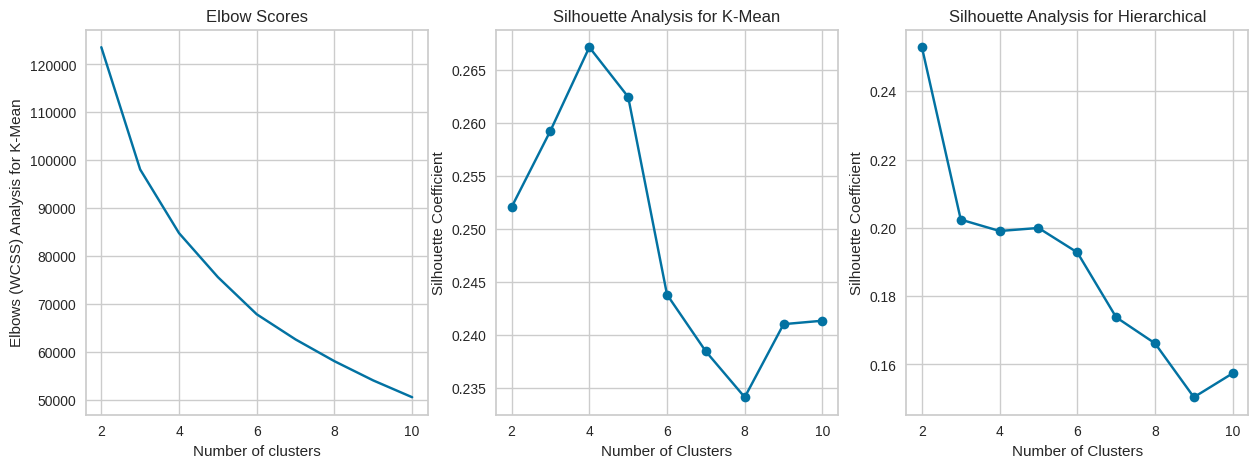

In [ ]:
#@title Visualize Each Method
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)

ax1.plot(range(2,11), pca_wcss,'bx-')
ax1.set_title('Elbow Scores')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Elbows (WCSS) Analysis for K-Mean')
ax1.grid(True)


ax2.plot(k_range, pca_kmean_silhouette, marker='o', label="Silhouette")
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Silhouette Coefficient')
ax2.set_title(f"Silhouette Analysis for K-Mean")
ax2.grid(True)

ax3.plot(k_range, pca_ag_silhouette, marker='o')
ax3.set_xlabel('Number of Clusters')
ax3.set_ylabel('Silhouette Coefficient')
ax3.set_title(f"Silhouette Analysis for Hierarchical")
ax3.grid(True)
plt.show()

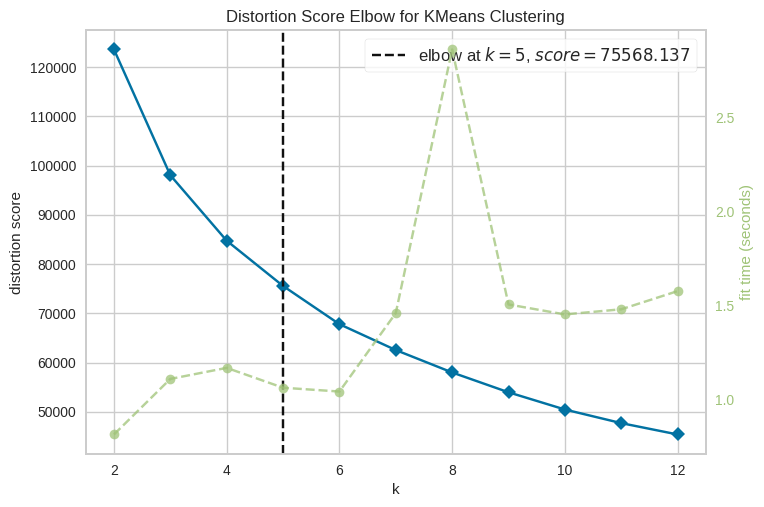

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Initialize the KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,13))

# Fit the data and visualize
visualizer.fit(pca_data)
visualizer.show()

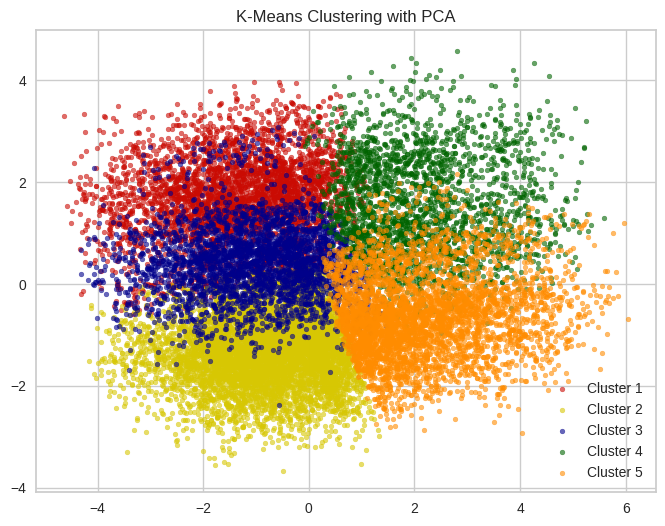


Process Time: 0.05162239074707031 seconds


In [ ]:
#@title K-Means (PCA)

# Fit K-Means
pcaKMean = KMeans(n_clusters = 5)
pcaKmeanLabel = pcaKMean.fit_predict(pca_data)

# Assign colors to each cluster
colors = ['r', 'y', 'darkblue', 'darkgreen', 'darkorange']
cluster_colors = [colors[label] for label in pcaKmeanLabel]

startTime = time.time()

# Plot each cluster with its assigned color
plt.figure(figsize=(8, 6))
for i in range(pcaKMean.n_clusters):
    plt.scatter(pca_data.iloc[pcaKmeanLabel == i, 0],
                pca_data.iloc[pcaKmeanLabel == i, 1],
                s=12, alpha=0.6, c=colors[i], label=f'Cluster {i+1}')

pca_kmeanProcessTime = time.time() - startTime

plt.title('K-Means Clustering with PCA')
plt.legend()
plt.show()

print(f"\nProcess Time: {pca_kmeanProcessTime} seconds")

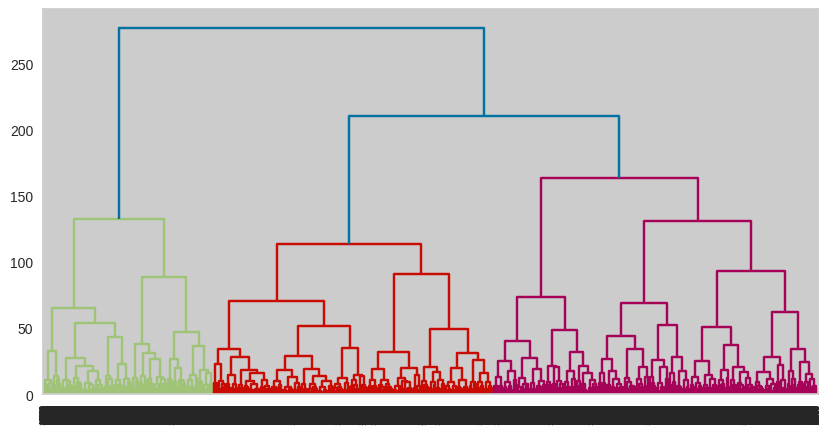

In [ ]:
#@title Hierarchical Clustering: Dendrogram (PCA)
linkage_matrix = linkage(pca_data, method='ward',metric='euclidean')

# Plotting the dendrogram
plt.figure(figsize=(10, 5))
startTime = time.time()
dendrogram(linkage_matrix)
pca_dendrogramProcessTime = time.time() - startTime

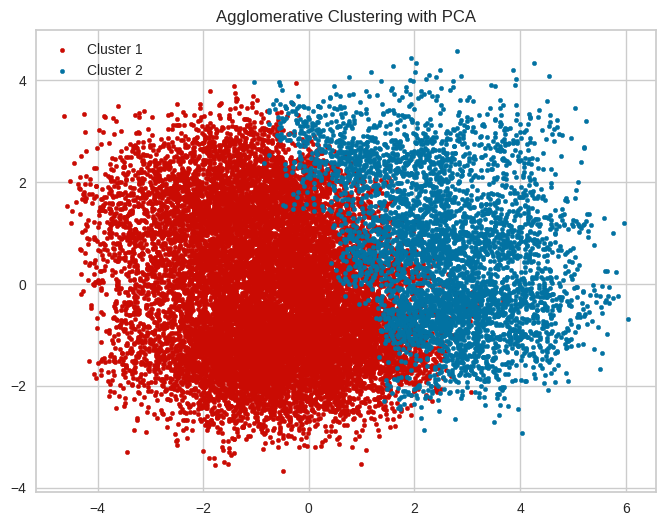


Process Time: 0.029031991958618164 seconds


In [ ]:
#@title PCA Hierarchical Clustering: Agglomerative (PCA)
# Perform Agglomerative Clustering
pca_ag_clustering = AgglomerativeClustering(n_clusters = 2, linkage = "ward", affinity ='euclidean')
pcaAgLabel = pca_ag_clustering.fit_predict(pca_data)

# Assign colors to each cluster
colors = ['r', 'b']
cluster_colors = [colors[label] for label in pcaAgLabel]

startTime = time.time()

# Plot each cluster with its assigned color
plt.figure(figsize=(8, 6))
for i in range(pca_ag_clustering.n_clusters):
    plt.scatter(pca_data.iloc[pcaAgLabel == i, 0],
                pca_data.iloc[pcaAgLabel == i, 1],
                s=10, c=colors[i], label=f'Cluster {i+1}')

pca_agProcessTime = time.time()-startTime

plt.title('Agglomerative Clustering with PCA')
plt.legend()
plt.show()

print(f"\nProcess Time: {pca_agProcessTime} seconds")

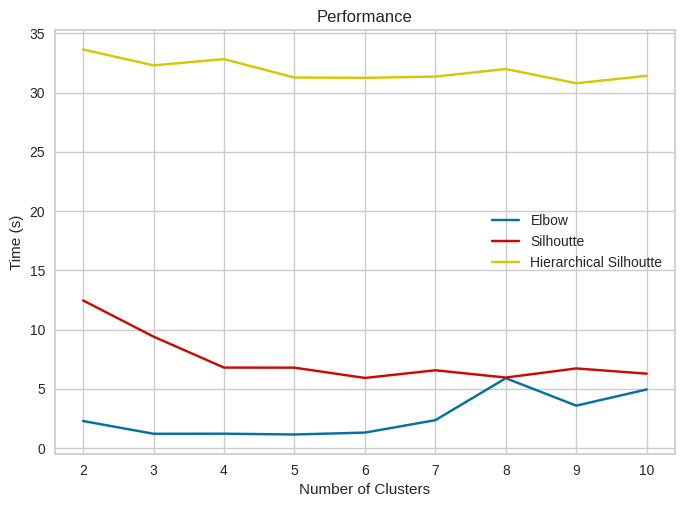

In [ ]:
#@title Comparison of Processing Time for Each Method

plt.plot(k_range, processing_times_pca_elbow, '-b', label="Elbow")
plt.plot(k_range, processing_times_pca_silhouette, '-r', label="Silhoutte")
plt.plot(k_range, pca_hierarchicalSilhouetteProcessTime, '-y', label="Hierarchical Silhoutte")
plt.xlabel('Number of Clusters')
plt.ylabel('Time (s)')
plt.title(f"Performance")
plt.grid(True)
plt.legend()
plt.show()

### Step 6: Original Clustering

In [ ]:
 #@title Elbow and Silhouette Methods
processtimes_elbow = []
processtimes_silhouette = []
processtime_hierarchical_silhouette_ =[]
wcss = []
print("Printing Elbow Scores...")
for i in k_range:
    start_time = time.time()
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit_predict(x)
    scores = kmeans.inertia_
    processtimes_elbow.append(time.time() - start_time)
    wcss.append(scores) #Elbow Method
    print("Elbow Score with {0} clusters is {1}".format(i,scores))

kmeans_silhouette = []
print("\n\nPrinting Silhouette Coefficient... ")
for i in k_range:
    start_time = time.time()
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(x)
    score = silhouette_score(x,labels) # Silhouette Method
    processtimes_silhouette.append(time.time() - start_time)
    kmeans_silhouette.append(score)
    print("Silhouette Coefficient with {0} clusters is {1}".format(i, score))

ag_silhouette = []
print("\n\nPrinting Silhouette Coefficient (Hierarchical)... ")
for i in range(2,11):
  start_time = time.time()
  agg_cluster = AgglomerativeClustering(n_clusters=i,affinity="euclidean",linkage = 'ward')
  labels = agg_cluster.fit_predict(x)
  score = silhouette_score(x,labels)
  processtime_hierarchical_silhouette_.append(time.time() - start_time)
  ag_silhouette.append(score)
  print("Silhouette Coefficient with {0} clusters is {1}".format(i, score))


Printing Elbow Scores...
Elbow Score with 2 clusters is 153660.27635209245
Elbow Score with 3 clusters is 128126.83082885855
Elbow Score with 4 clusters is 114171.19079004621
Elbow Score with 5 clusters is 104931.7523059401
Elbow Score with 6 clusters is 97242.49880875563
Elbow Score with 7 clusters is 91784.16641252293
Elbow Score with 8 clusters is 86978.39200773303
Elbow Score with 9 clusters is 82402.54378063725
Elbow Score with 10 clusters is 78679.1339527632


Printing Silhouette Coefficient... 
Silhouette Coefficient with 2 clusters is 0.2195004401899766
Silhouette Coefficient with 3 clusters is 0.21085395222056755
Silhouette Coefficient with 4 clusters is 0.21885728592502204
Silhouette Coefficient with 5 clusters is 0.2131405243709276
Silhouette Coefficient with 6 clusters is 0.19341456377141217
Silhouette Coefficient with 7 clusters is 0.1938401061577722
Silhouette Coefficient with 8 clusters is 0.18351748313669394
Silhouette Coefficient with 9 clusters is 0.1889430858822953
S

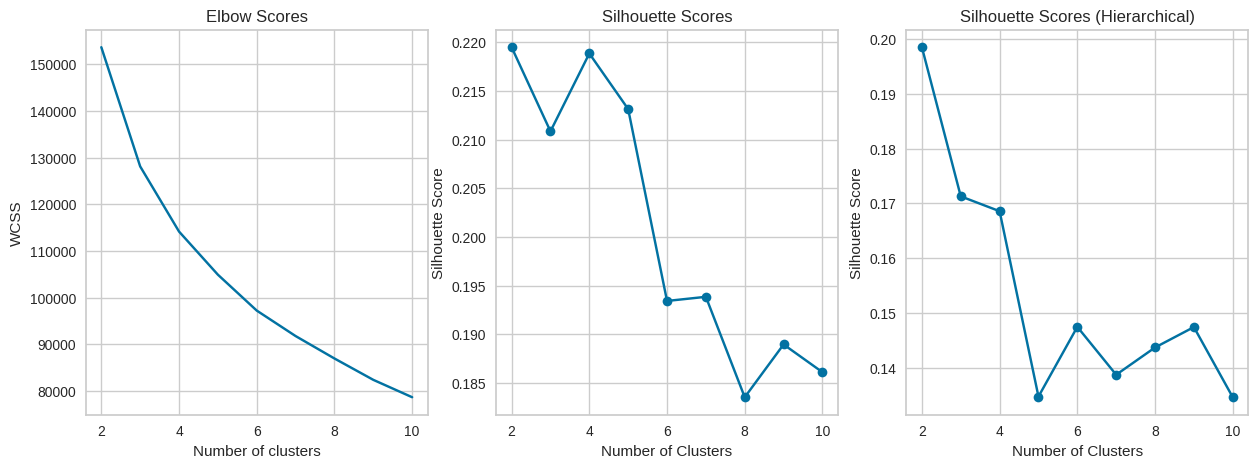

In [ ]:
#@title Visualize Each Method
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)

#Elbow Method
ax1.plot(k_range, wcss,'bx-')
ax1.set_title('Elbow Scores')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('WCSS')
ax1.grid(True)

#Silhouette Method
ax2.plot(k_range, kmeans_silhouette, marker='o')
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Silhouette Score')
ax2.set_title(f"Silhouette Scores")
ax2.grid(True)

#Hierarchical Silhouette Method
ax3.plot(k_range, ag_silhouette, marker='o')
ax3.set_xlabel('Number of Clusters')
ax3.set_ylabel('Silhouette Score')
ax3.set_title(f"Silhouette Scores (Hierarchical)")
ax3.grid(True)

plt.show()

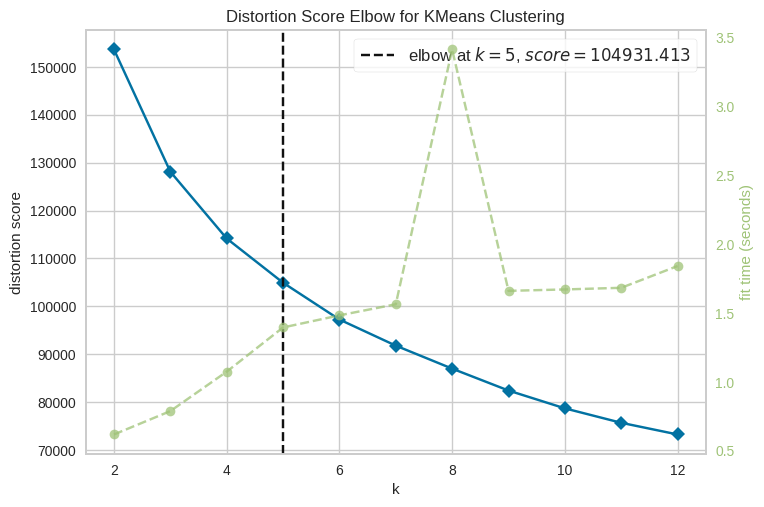

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Initialize the KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,13))

# Fit the data and visualize
visualizer.fit(scaled_data)
visualizer.show()

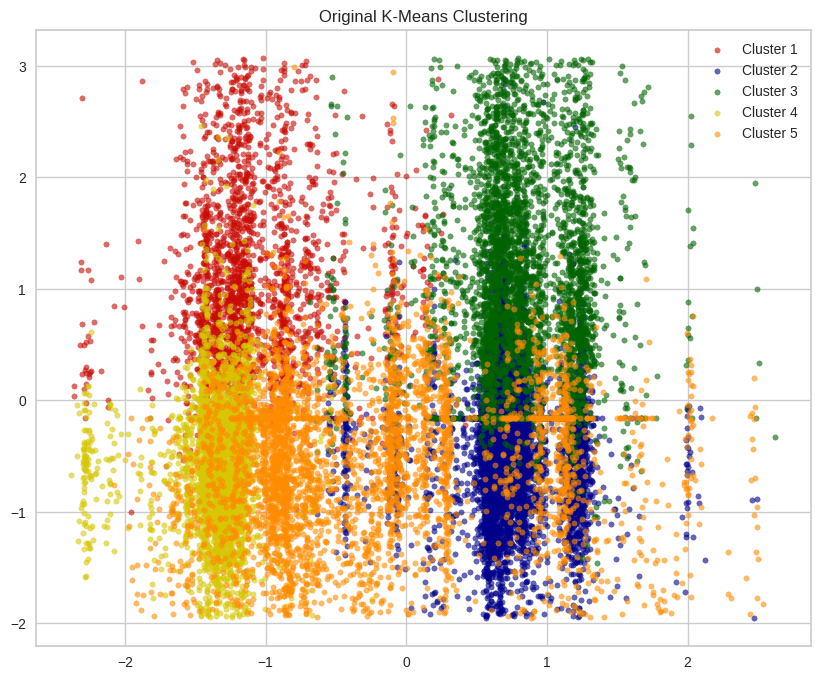

In [ ]:
#@title K-Means (Original)

kmeans = KMeans(n_clusters=5)
# kmeans.fit(x)
y_predict = kmeans.fit_predict(x)

# Assign colors to each cluster
colors = ['r', 'darkblue', 'darkgreen', 'y','darkorange']  # Example colors for up to 5 clusters

# Plot each cluster with its assigned color
plt.figure(figsize=(10, 8))
for i in range(kmeans.n_clusters):
    plt.scatter(x.iloc[y_predict == i, 0], x.iloc[y_predict == i, 5],
                c=colors[i], alpha=0.6, s=15, label=f'Cluster {i+1}')

plt.title('Original K-Means Clustering')
plt.legend()
plt.show()

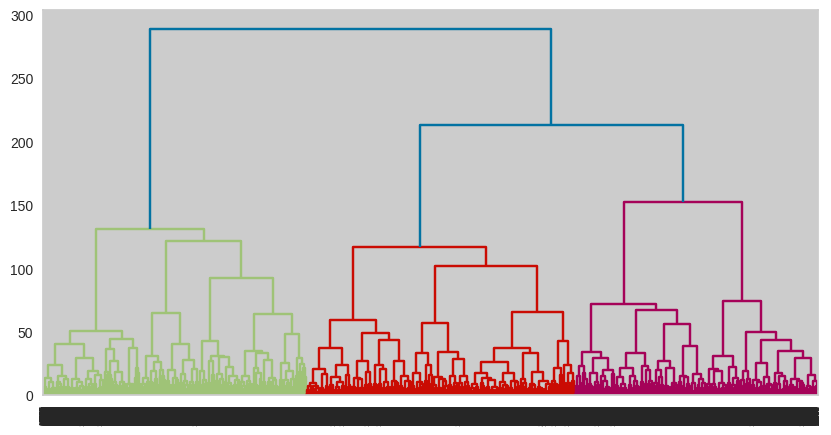

In [ ]:
#@title Hierarchical Clustering: Dendrogram (Original)

# Performing Hierarchical Clustering
# The 'ward' linkage method helps to minimizes the variance of clusters being merged.
linkage_matrix = linkage(x, method='ward',metric='euclidean')

# Plotting the Dendrogram
plt.figure(figsize=(10, 5))
start_time = time.time()
dendrogram(linkage_matrix)
dendrogramProcessTime = time.time() - start_time

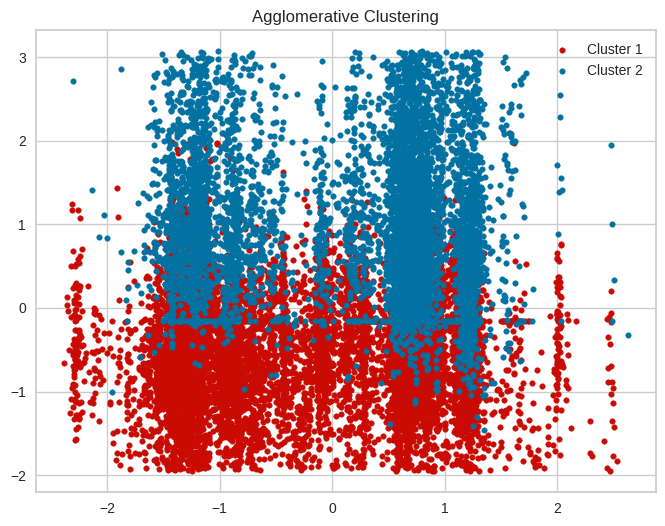

Process Time: 0.6067795753479004 seconds


In [ ]:
#@title Hierarchical clustering: Agglomerative (Original)
ag = AgglomerativeClustering(n_clusters = 2,linkage="ward",affinity='euclidean')
AgLabel = ag.fit_predict(x)
startTime = time.time()

# Assign colors to each cluster
colors = ['r', 'b']  # Example colors for up to 2 clusters

# Plot each cluster with its assigned color
plt.figure(figsize=(8, 6))
for i in range(ag.n_clusters):
    plt.scatter(x.iloc[AgLabel == i, 0], x.iloc[AgLabel == i, 5],
                s=16, c=colors[i], label=f'Cluster {i + 1}')

plt.title('Agglomerative Clustering')
plt.legend()
plt.show()

agProcessTime = time.time() - startTime
print(f"Process Time: {agProcessTime} seconds")

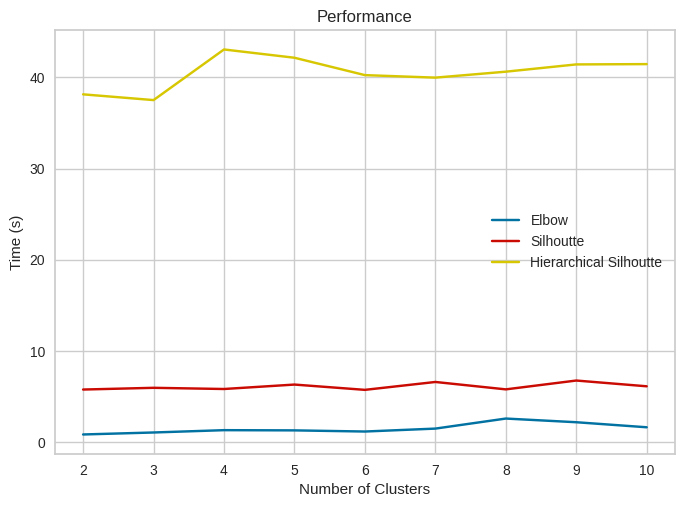

In [ ]:
#@title Comparing processing times for elbow and Silhouette and hierarchical

plt.plot(k_range, processtimes_elbow, '-b', label="Elbow")
plt.plot(k_range, processtimes_silhouette, '-r', label="Silhoutte")
plt.plot(k_range, processtime_hierarchical_silhouette_, '-y', label="Hierarchical Silhoutte")
plt.xlabel('Number of Clusters')
plt.ylabel('Time (s)')
plt.title(f"Performance")
plt.grid(True)
plt.legend()
plt.show()

### Step 7: Comparison between orginal clustering and PCA clustering

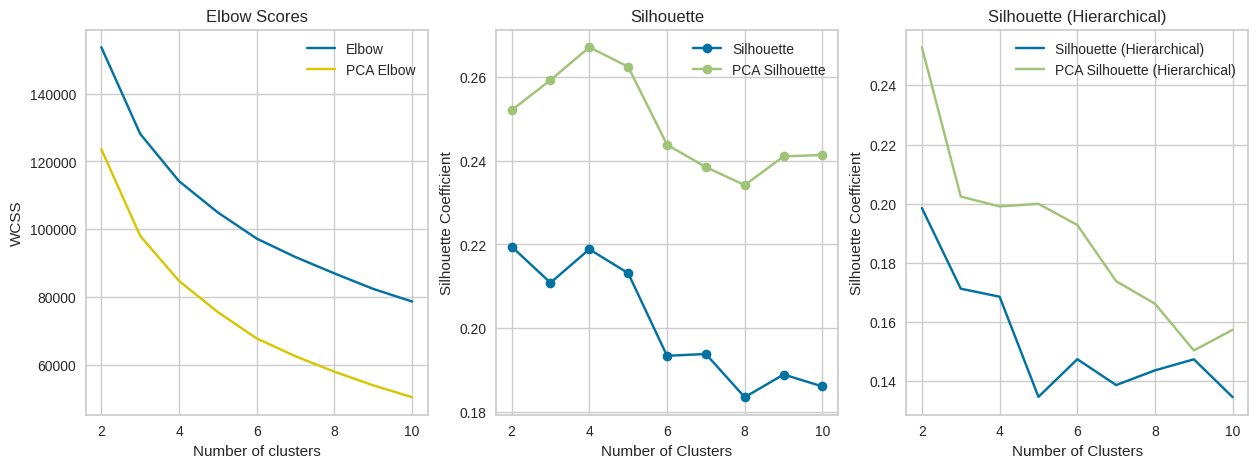

In [ ]:
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)

ax1.plot(k_range, wcss,'bx-',label="Elbow")
ax1.plot(k_range, pca_wcss,'bx-',c='y',label="PCA Elbow")
ax1.set_title('Elbow Scores')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('WCSS')
ax1.grid(True)
ax1.legend()

ax2.plot(k_range, kmeans_silhouette, marker='o', label="Silhouette")
ax2.plot(k_range, pca_kmean_silhouette, marker='o', label="PCA Silhouette")
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Silhouette Coefficient')
ax2.set_title(f"Silhouette")
ax2.grid(True)
ax2.legend()

ax3.plot(k_range, ag_silhouette,  label="Silhouette (Hierarchical)")
ax3.plot(k_range, pca_ag_silhouette, label="PCA Silhouette (Hierarchical)")
ax3.set_xlabel('Number of Clusters')
ax3.set_ylabel('Silhouette Coefficient')
ax3.set_title(f"Silhouette (Hierarchical)")
ax3.grid(True)
ax3.legend()

plt.show()

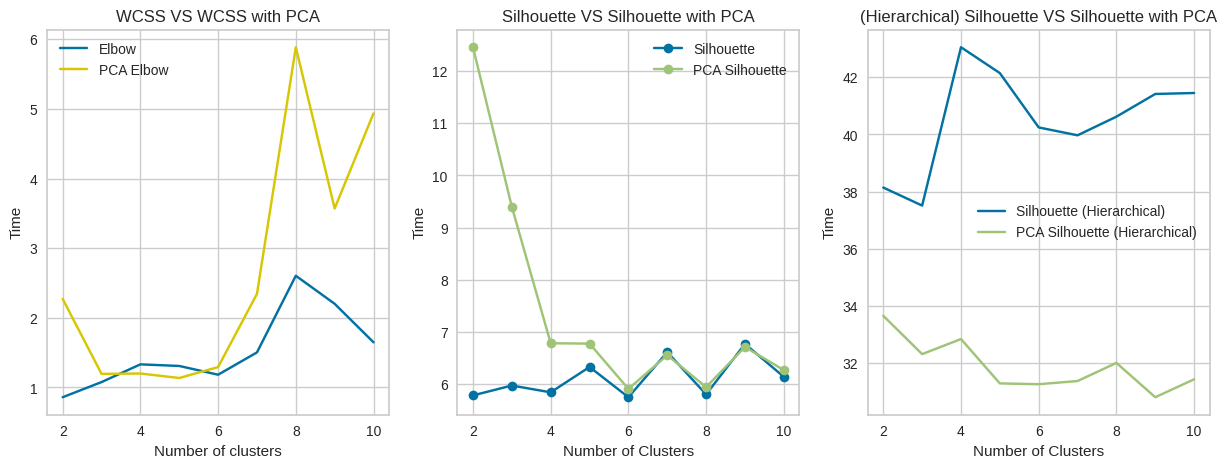

In [ ]:
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)

ax1.plot(k_range, processtimes_elbow,'bx-',label="Elbow")
ax1.plot(k_range, processing_times_pca_elbow,'bx-',c='y',label="PCA Elbow")
ax1.set_title('WCSS VS WCSS with PCA')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Time')
ax1.grid(True)
ax1.legend()

ax2.plot(k_range, processtimes_silhouette, marker='o', label="Silhouette")
ax2.plot(k_range, processing_times_pca_silhouette, marker='o', label="PCA Silhouette")
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Time')
ax2.set_title(f"Silhouette VS Silhouette with PCA")
ax2.grid(True)
ax2.legend()

ax3.plot(k_range, processtime_hierarchical_silhouette_,  label="Silhouette (Hierarchical)")
ax3.plot(k_range, pca_hierarchicalSilhouetteProcessTime, label="PCA Silhouette (Hierarchical)")
ax3.set_xlabel('Number of Clusters')
ax3.set_ylabel('Time')
ax3.set_title(f"(Hierarchical) Silhouette VS Silhouette with PCA")
ax3.grid(True)
ax3.legend()

plt.show()

In [ ]:
compare_scores = pd.DataFrame({"Elbow":wcss,
                               "PCA Elbow":pca_wcss,
                               "Silhouette":kmeans_silhouette,
                               "PCA Silhouette":pca_kmean_silhouette,
                               "AG Silhouette":ag_silhouette,
                               "PCA AG Silhouette":pca_ag_silhouette}
                             )
print("Scores\n")
compare_scores

Scores



,Elbow,PCA Elbow,Silhouette,PCA Silhouette,AG Silhouette,PCA AG Silhouette
0,153660.276352,123592.491007,0.219500,0.252065,0.198516,0.252896
1,128126.830829,98053.748835,0.210854,0.259252,0.171278,0.202415
2,114171.190790,84758.157491,0.218857,0.267109,0.168563,0.199078
3,104931.752306,75567.577293,0.213141,0.262433,0.134704,0.199967
4,97242.498809,67806.104675,0.193415,0.243823,0.147441,0.192800
5,91784.166413,62545.990493,0.193840,0.238474,0.138693,0.173800
6,86978.392008,58001.875740,0.183517,0.234168,0.143672,0.166173
7,82402.543781,53979.489600,0.188943,0.241045,0.147401,0.150398
8,78679.133953,50477.012393,0.186092,0.241369,0.134588,0.157411


In [ ]:
compare_time = pd.DataFrame({
    "Elbow":processtimes_elbow,
    "PCA Elbow":processing_times_pca_elbow,
    "Silhouette":processtimes_silhouette,
    "PCA Silhouette":processing_times_pca_silhouette,
    "AG Silhouette":processtime_hierarchical_silhouette_,
    "PCA AG Silhouette":pca_hierarchicalSilhouetteProcessTime
    })

print("Time performance\n")
compare_time

Time performance



,Elbow,PCA Elbow,Silhouette,PCA Silhouette,AG Silhouette,PCA AG Silhouette
0,0.860095,2.271707,5.784932,12.455723,38.139201,33.645678
1,1.077637,1.195397,5.973987,9.398067,37.508294,32.303026
2,1.332135,1.200736,5.843705,6.784019,43.056709,32.830764
3,1.309149,1.136108,6.329580,6.777140,42.150184,31.276602
4,1.183327,1.293199,5.749992,5.909497,40.246199,31.248211
5,1.503855,2.344885,6.614637,6.555759,39.969917,31.359359
6,2.604888,5.887178,5.803593,5.943704,40.622666,31.995410
7,2.201805,3.571410,6.771430,6.712319,41.418493,30.792212
8,1.648726,4.937052,6.140064,6.269731,41.452211,31.419540


In [ ]:
print("Hierarchical Dendrogram Process Time: ",dendrogramProcessTime)
print("PCA Hierarchical Dendrogram Process Time: ",pca_dendrogramProcessTime)
print("\n")
print("Hierarchical Clustering Process Time: ",agProcessTime)
print("PCA Hierarchical Clustering Process Time: ",pca_agProcessTime)

Hierarchical Dendrogram Process Time:  36.074300050735474
PCA Hierarchical Dendrogram Process Time:  42.53232765197754


Hierarchical Clustering Process Time:  0.6067795753479004
PCA Hierarchical Clustering Process Time:  0.029031991958618164
